# Figures for theof the The Bayesian Operating Characteristic Curve for Feature Analysis aapplied to Urban Land cover Change  

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

import boc_analysis as ba
import importlib
importlib.reload(ba) 

from sklearn.metrics import roc_auc_score



In [2]:
#cargando base de datos

Xva = pd.read_csv("data/Morelia_validation_X.csv")
Yva = pd.read_csv("data/Morelia_validation_Y.csv")

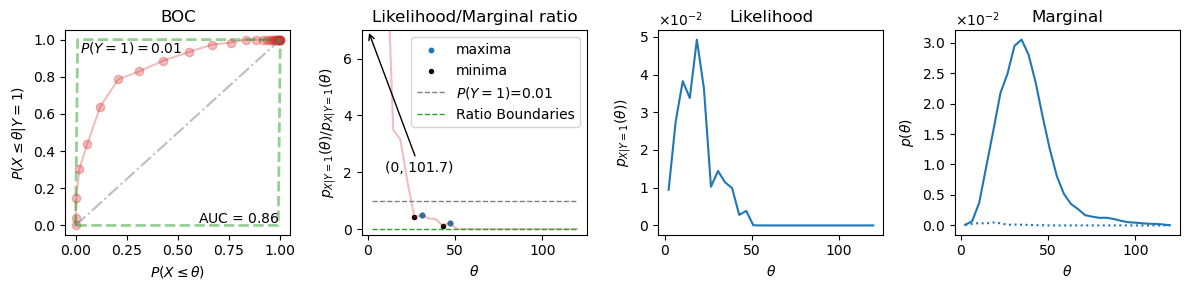

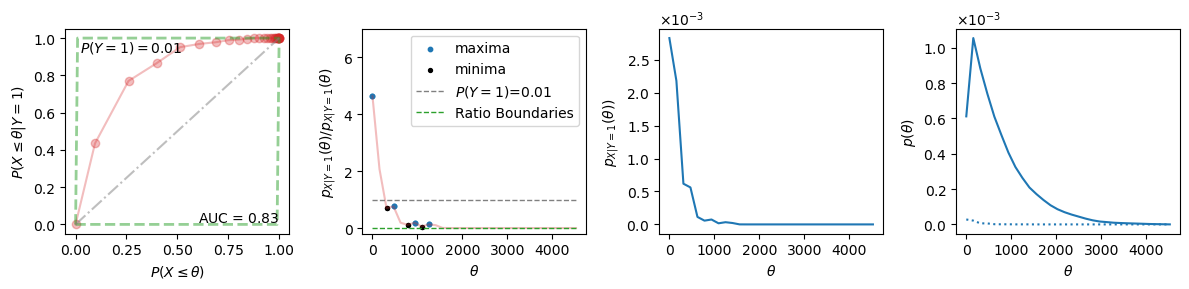

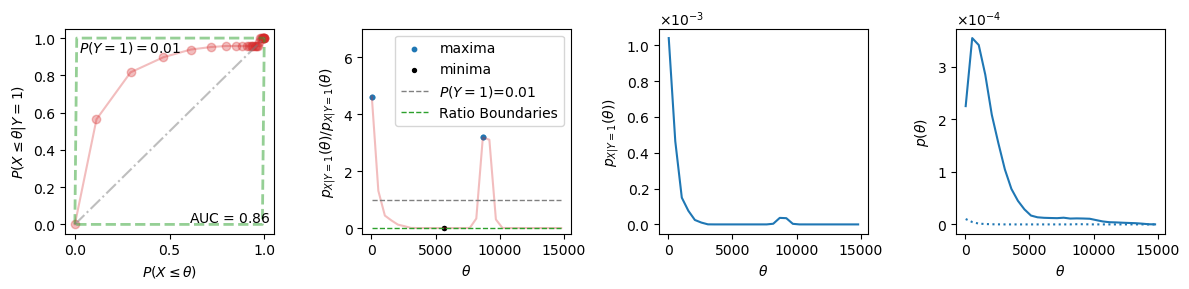

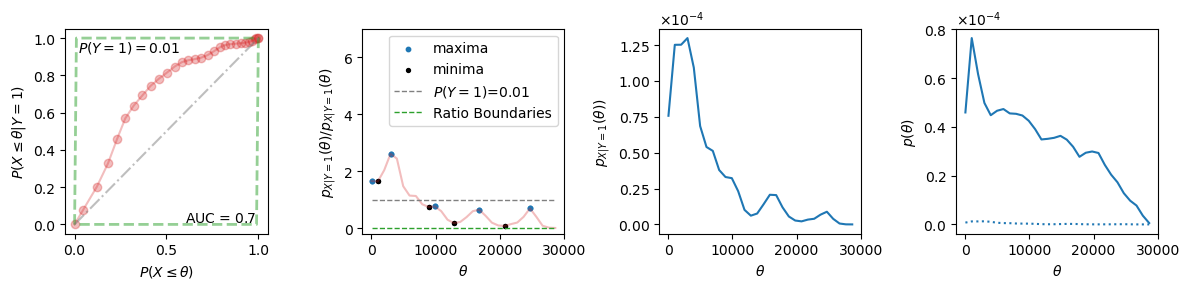

In [3]:
for i, c in enumerate(Xva.columns[np.array([7, 6, 4, 1])+3]):

    #Setting plot string titles
    title01 = c
    title02 = "Likelihood/Prior"
    title03 = "Likelihood"
    title04 = "Prior" 


    DTITLE = [title01, title02, title03, title04] 

    X = np.array(Xva[c])
    Y = np.array(Yva['incremento_urbano'])    
    D2 = {"X": X, "Y": Y, "color":"tab:blue", "label": "", "variable": c}

    D = [D2]

    a, x = ba.bocplot(D, DTITLE, i, intervals = 30)

    plt.tight_layout()
    plt.savefig("{n}_boc_{c}.pdf".format(n=i, c=c))

In [ ]:
jumps = 10 #change this parameter to 10 to reproduce the precision of the paper figures


#Selecting a feature and class labels

M = Yva["incremento_urbano"].mean()

for i, c in enumerate(Xva.columns[3: 3+8]):

    print("variable", c)
    
    X = Xva[c].to_numpy()
    label = Yva["incremento_urbano"].to_numpy()
    LA, PA, MA = ba.getLPM(X, label, jumps = jumps)

    #feature A
    feature = np.array(M*LA/PA)
    Xva["posterior_{s}".format(s = c, r = str(jumps))] = feature


variable pendiente
variable dist_anps
variable dist_agua
variable dist_vegetacion
variable dist_urbano
variable dist_centro
variable dist_carreteras
variable costo


In [7]:
shift =  11

variable_selector = np.array([1, 4, 6, 7])

alias = np.array(["SL", "DPA", "DWS", "DV", "DU", "DC", "DR", "TT"])

Xva.columns[shift + variable_selector]

alias_combinations = [a for a in it.combinations(alias[variable_selector], 2) ]

label = Yva["incremento_urbano"]

M = Yva["incremento_urbano"].mean()

Combination: 0 posterior_dist_anps - posterior_dist_urbano
AUC: 0.3000
AUC: 0.1400
AUC: 0.1700


/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))


Combination: 1 posterior_dist_anps - posterior_dist_carreteras
AUC: 0.3000
AUC: 0.1900
AUC: 0.1800
Combination: 2 posterior_dist_anps - posterior_costo
AUC: 0.3000
AUC: 0.1700
AUC: 0.1700


/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))
/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))


Combination: 3 posterior_dist_urbano - posterior_dist_carreteras
AUC: 0.1400
AUC: 0.1900
AUC: 0.1400
Combination: 4 posterior_dist_urbano - posterior_costo
AUC: 0.1400
AUC: 0.1700
AUC: 0.1300


/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))
/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))


Combination: 5 posterior_dist_carreteras - posterior_costo
AUC: 0.1900
AUC: 0.1700
AUC: 0.1300


/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))
/tmp/ipykernel_2754/835865371.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(r"{s}.pdf".format(s=title_string))
/home/rdglpz/miniforge3/envs/ML/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


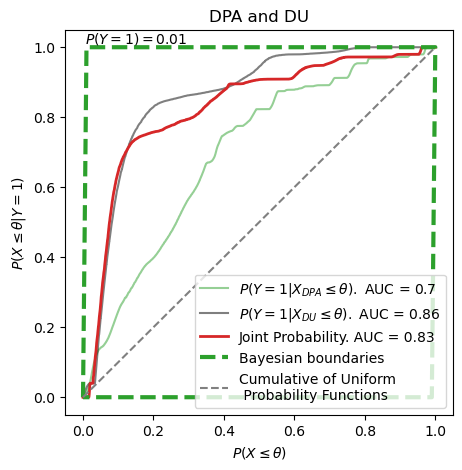

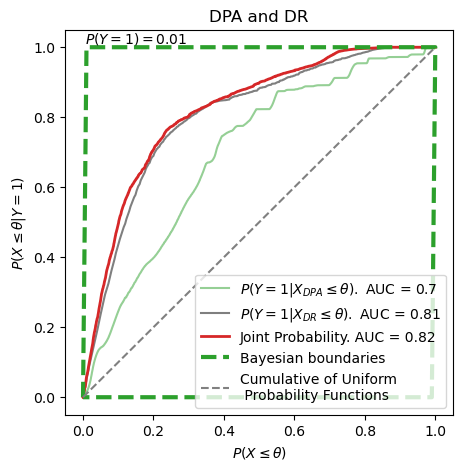

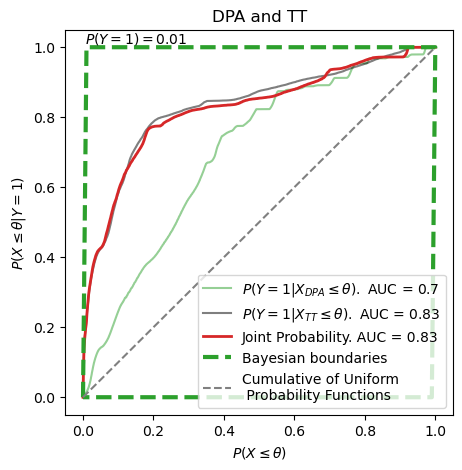

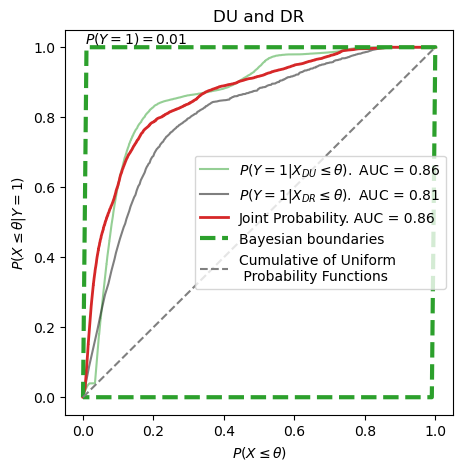

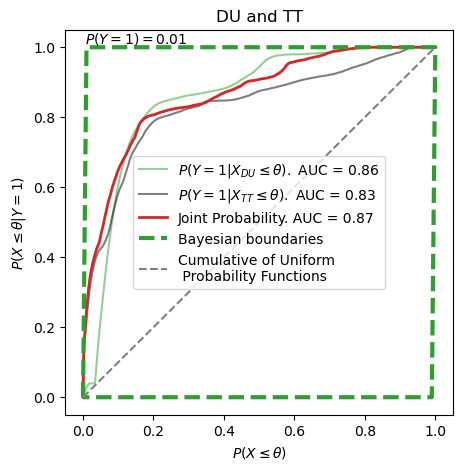

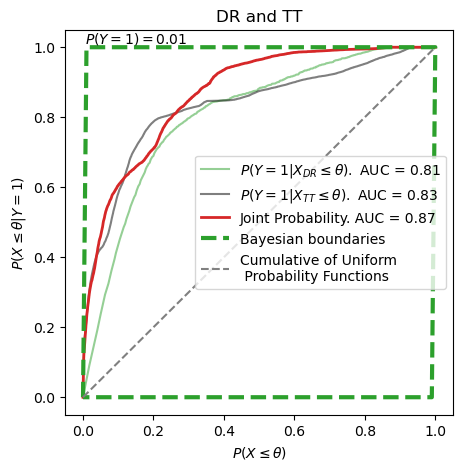

In [8]:
for i, c in enumerate(it.combinations(Xva.columns[shift + variable_selector], 2)):
    
    plt.figure(figsize = (5,5))

    va, vb = c[0], c[1]
    
    #alias
    aa, ab = alias_combinations[i][0], alias_combinations[i][1] 
    print("Combination: {i}".format(i=i), va, "-", vb)
    

    #feature A
    feature = -Xva[c[0]]
    
    auc_score = round(roc_auc_score(label, -feature),2)
    print(f"AUC: {1-auc_score:.4f}")
    T = pd.DataFrame({"X": feature , "Y": label })
    HPFA = np.concatenate(([0], T.sort_values(["X","Y"]).groupby("X").count().cumsum().to_numpy().flatten()))
    H = np.concatenate(([0], T.sort_values(["X","Y"]).groupby("X").sum("Y").cumsum().to_numpy().flatten()))
    label_string = r"$P(Y=1|X_{{{s}}}\leq \theta).$ AUC = {auc}".format(s=aa, auc = auc_score)
    plt.plot(HPFA/HPFA[-1], H/H[-1], label = label_string, color = "tab:green", alpha = 0.5)
 

    #feature B
    feature = -Xva[c[1]]
    auc_score = round(roc_auc_score(label, -feature),2)
    print(f"AUC: {1-auc_score:.4f}")
    T = pd.DataFrame({"X": feature , "Y": label })
    HPFA = np.concatenate(([0], T.sort_values(["X","Y"]).groupby("X").count().cumsum().to_numpy().flatten()))
    H = np.concatenate(([0], T.sort_values(["X","Y"]).groupby("X").sum("Y").cumsum().to_numpy().flatten()))

    label_string = r"$P(Y=1|X_{{{s}}}\leq \theta).$ AUC = {auc}".format(s=ab, auc = auc_score)
    plt.plot(HPFA/HPFA[-1], H/H[-1], label = label_string, color = "k", alpha = 0.5)
 

    #Feature A*B
    feature = -Xva[c[0]]*Xva[c[1]]
    auc_score = round(roc_auc_score(label, -feature),2)
    print(f"AUC: {1-auc_score:.4f}")
    T = pd.DataFrame({"X": feature , "Y": label })
    HPFA = np.concatenate(([0], T.sort_values(["X","Y"]).groupby("X").count().cumsum().to_numpy().flatten()))
    H = np.concatenate(([0], T.sort_values(["X","Y"]).groupby("X").sum("Y").cumsum().to_numpy().flatten()))
    
    
    label_string = r"{s}. AUC = {auc}".format(s="Joint Probability", auc = auc_score)


    plt.plot(HPFA/HPFA[-1], H/H[-1], color = "tab:red", linewidth = 2.0, label =  label_string)
    
    #TOC Template components
    plt.plot([0, M, 1, 1-M, 0 ], [0,1,1,0,0], color ="tab:green", linewidth=3, linestyle = "--", label = "Bayesian boundaries")
    plt.plot([0,1], [0,1], color = "gray",linestyle = "dashed", label = "Cumulative of Uniform \n Probability Functions")
    
    title_string = r"{a} and {b}".format(a = aa, b=ab)
    plt.title(title_string)
    plt.xlabel(r'$P(X \leq \theta)$')
    plt.ylabel(r'$P(X \leq \theta | Y=1)$')
    plt.text(0+0.005,1.012, r"$P(Y=1)={s}$".format(s=round(M, 3)))



    plt.legend()
    plt.savefig(r"{s}.pdf".format(s=title_string))